## Day 34 Lecture 1 Assignment

In this assignment, we will learn about SVR. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

In [ ]:
%matplotlib inline

import math

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
absent = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [ ]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


We previously used this dataset for KNN regression. Recall that we removed all correlated columns as well as columns that are a function of two or more other columns (like BMI and weight and height) as well as columns that are not useful to us (like ID).
We also created dummy variables for the categorical columns in our dataset.
Finally, we split the data into test and train (with test being 20% of the data).

Perform these actions below.

In [ ]:
absent.drop(['ID', 'Body mass index'], axis=1, inplace=True)

In [ ]:
#answer below:

X = absent.drop('Absenteeism time in hours', axis=1)
y = absent['Absenteeism time in hours']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scale the independent variables using the standard scaler

In [ ]:
# answer below:
num = ['Transportation expense', 'Distance from Residence to Work', 
       'Service time', 'Work load Average/day ', 'Hit target',
       'Height', 'Son', 'Pet']
cat = ['Reason for absence', 'Day of the week', 'Seasons',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker']

scaler = StandardScaler()
onehot = OneHotEncoder(drop='first', sparse=False)

preproc = ColumnTransformer(transformers=[('num', scaler, num),
                                          ('cat', onehot, cat)])

Generate an SVR model to predict the number of hours of absenteeism. Compare the train and test scores.

In [ ]:
# answer below:
parameters = {'kernel':('linear', 'poly', 'rbf'), 'C':[1, 10, 100]}
svm = SVR()
clf = GridSearchCV(svm, parameters)
clf.fit(X_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100],
                         'kernel': ('linear', 'poly', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
clf.best_estimator_

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [ ]:

print(f'Best train score: {clf.score(X_train, y_train)}')
print(f'Best test score: {clf.score(X_test, y_test)}')

Best train score: 0.0021701704312578896
Best test score: 0.024573127115410594


If you are unhappy with your model's performance, perform a grid search to optimize C. You may also want to compare something other than R squared, like MSE, and could try some other kernels than just linear.

In [ ]:
# answer below:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
err = y_train-y_pred_train

Create a homoscedasticity (residual) plot. Look back at your KNN regression exercise (Day 32 Lecture 1). How do your model results compare?

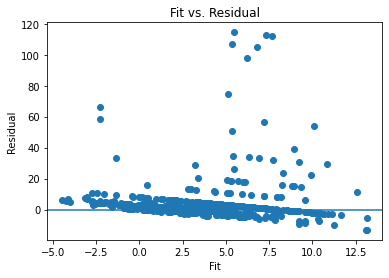

In [ ]:
# answer below:
plt.scatter(y_pred_train, err)
plt.xlabel('Fit')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Fit vs. Residual')
plt.show()